In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [86]:
data_train = pd.read_csv('Fashion MNIST/fashion-mnist_train.csv')
data_test = pd.read_csv('Fashion MNIST/fashion-mnist_test.csv')

In [87]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [88]:
x_train = np.array(data_train.iloc[:, 1:])
y_train = np.array(data_train.iloc[:, 0])

In [89]:
y_train

array([2, 9, 6, ..., 8, 8, 7])

In [90]:
x_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

In [91]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

In [103]:
num_classes = 10
epochs = 25

img_rows, img_cols = 28, 28

optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'

In [104]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [105]:
model.compile(optimizer = optimizer, 
              loss = loss, 
              metrics=['accuracy'])

In [106]:
history = model.fit(x_train, 
                    y_train,
                   epochs = epochs)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3928 - accuracy: 0.8597
Epoch 2/25
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2660 - accuracy: 0.9042
Epoch 3/25
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2234 - accuracy: 0.9176
Epoch 4/25
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1865 - accuracy: 0.9307
Epoch 5/25
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1604 - accuracy: 0.9405
Epoch 6/25
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1353 - accuracy: 0.9502
Epoch 7/25
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1147 - accuracy: 0.9578
Epoch 8/25
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0960 - accuracy: 0.9646
Epoch 9/25
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0814 - accuracy: 0.9707
Epoch

In [107]:
test_loss, test_acc = model.evaluate(x_test, 
                                     y_test)

10000/10000 [==============================] - 1s 95us/sample - loss: 0.5826 - accuracy: 0.9172


In [108]:
test_acc

0.9172

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

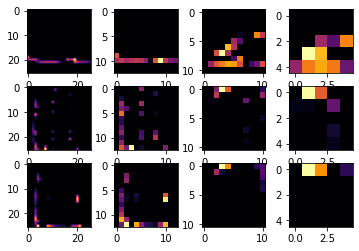

In [121]:
predicted_classes = model.predict_classes(x_test)

y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)
incorrect = np.nonzero(predicted_classes!=y_true)

In [124]:
correct

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

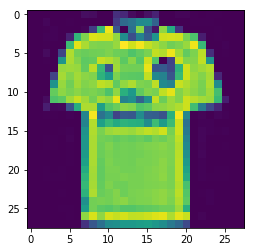

In [157]:
plt.imshow(x_test[0].reshape(28,28))